In [2]:
import time
import os

import dotenv
import pydot
import requests
import numpy as np
import pandas as pd
import ctypes
import shutil
import multiprocessing
import multiprocessing.sharedctypes as sharedctypes
import os.path
import ast
import librosa, librosa.display

import IPython.display as ipd
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from tempfile import mktemp
from pydub import AudioSegment
from scipy.io import wavfile
import keras
import matplotlib.pyplot as plt
from IPython.display import Audio

from music_plots import *

np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [8]:
tracks_df = load("data/tracks.csv")
genres_df = load("data/genres.csv")
echonest_df = load("data/echonest.csv")
features_df = load("data/features.csv")

In [3]:
#tracks_df[tracks_df['track_id']==6606]
#tracks2_df.head()
print(tracks_df.columns)
tracks_df.head()

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

          ...       track                         \
          ... information interest language_code   
track_id  ...                                      
2         ...         NaN     4656            en   
3         ...         NaN     1470            en   
5         ...         NaN     1933            en   
10        ...         NaN    54881            en   
20        ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [29]:
genres_df.loc[12]

#tracks      32923
parent           0
title         Rock
top_level       12
Name: 12, dtype: object

In [32]:
genres_df[genres_df['parent']==0]

,#tracks,parent,title,top_level
genre_id,,,,
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9
10,13845,0,Pop,10
12,32923,0,Rock,12
13,730,0,Easy Listening,13


In [5]:
print(echonest_df.columns)
echonest_df.head()

MultiIndex([('echonest',    'audio_features',     'acousticness'),
            ('echonest',    'audio_features',     'danceability'),
            ('echonest',    'audio_features',           'energy'),
            ('echonest',    'audio_features', 'instrumentalness'),
            ('echonest',    'audio_features',         'liveness'),
            ('echonest',    'audio_features',      'speechiness'),
            ('echonest',    'audio_features',            'tempo'),
            ('echonest',    'audio_features',          'valence'),
            ('echonest',          'metadata',       'album_date'),
            ('echonest',          'metadata',       'album_name'),
            ...
            ('echonest', 'temporal_features',              '214'),
            ('echonest', 'temporal_features',              '215'),
            ('echonest', 'temporal_features',              '216'),
            ('echonest', 'temporal_features',              '217'),
            ('echonest', 'temporal_features', 

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [ ]:
print(features_df.columns)
features_df.head()

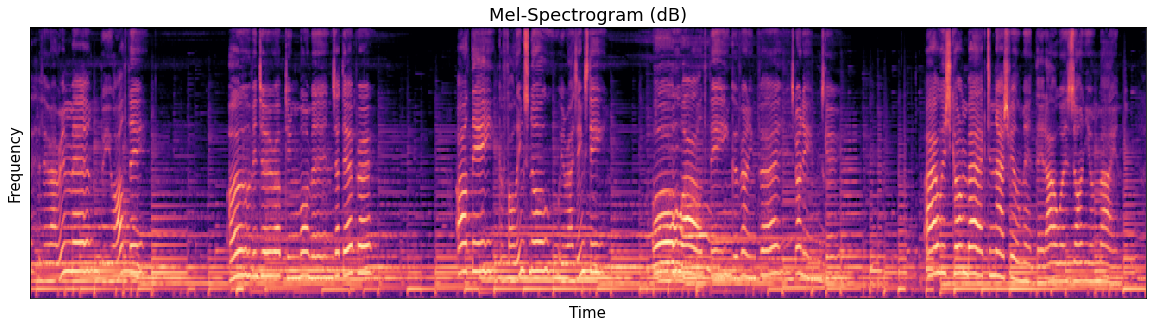

In [8]:
plot_mel_spectrogram('data/tracks_wav/127266.wav')

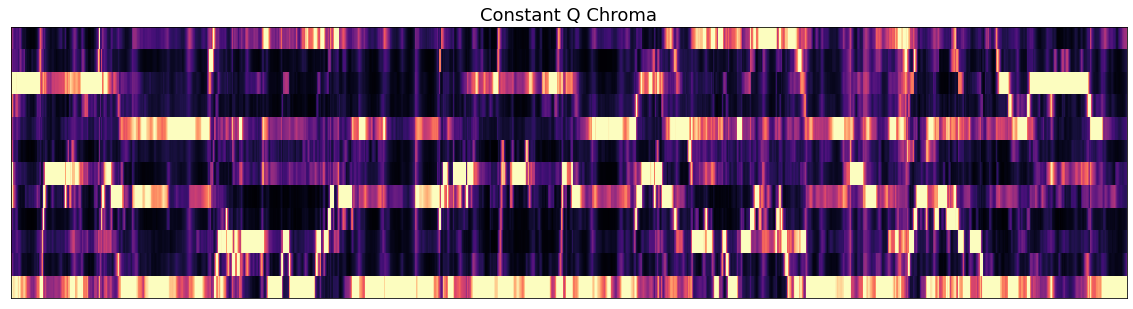

In [9]:
plot_chroma('data/tracks_wav/127266.wav')

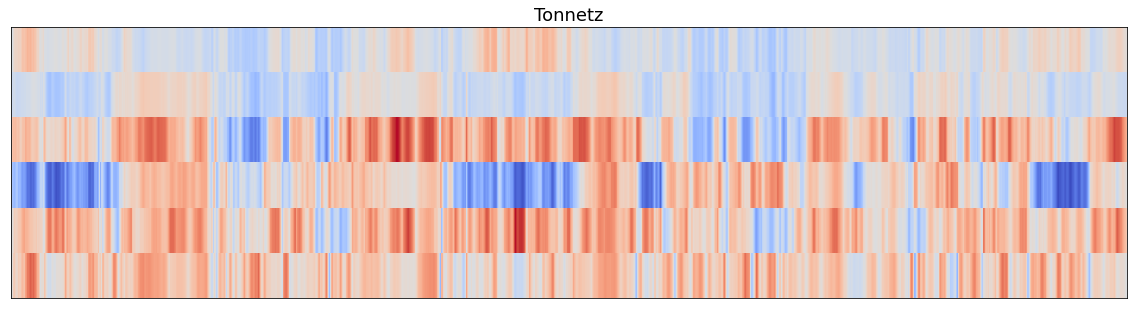

In [10]:
plot_tonnetz('data/tracks_wav/127266.wav')

/Users/daniele/PycharmProjects/ML/music_plots.py:23: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03241264 -0.02648086
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(signal, sr=sr)


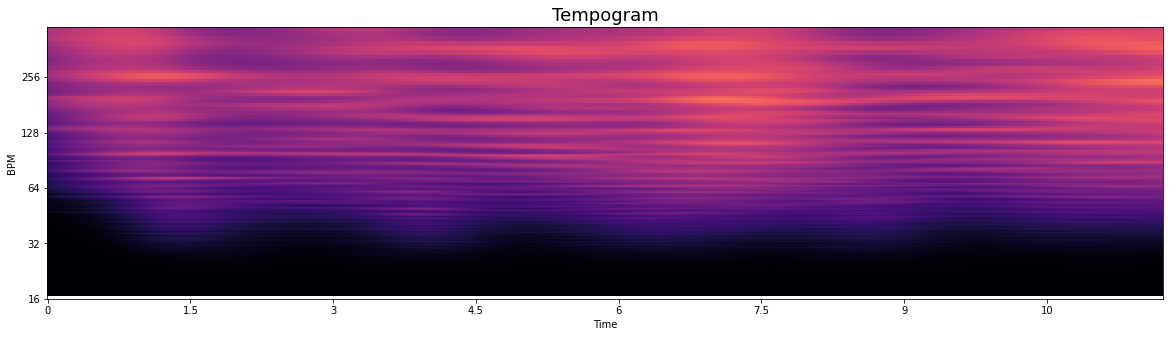

In [11]:
plot_tempogram('data/tracks_wav/127266.wav')

In [1]:
generate_mel_spectrogram('data/tracks_wav/127266.wav')

NameError: name 'generate_mel_spectrogram' is not defined

In [11]:
from utils import get_features

x = get_features(['data/tracks_wav/127266.wav', 'data/tracks_wav/000002.wav'])
display(x)
display(features_df.loc[127266])

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
0            -0.605912 -0.803135 -0.385421 -0.486602  0.018416  0.403369   
1            -0.217179 -0.726627 -0.491414 -0.721757 -0.545637  0.909584   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
0           2.367104  1.111748  0.032254  0.577222  ...  0.151173  0.078696   
1           0.786965  0.917240 -0.793050  0.452531  ...  0.102472  0.029663   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
0           0.054672  26.758322  0.239746  0.029737  0.022949  0.005371   
1           0.037664   3.497347  0.416504  0.098369  0.078613  0.006348   

feature                         
statistics      skew       std  
number            01        01  
0           4.539645  0.025977  
1           1.825639  0.068398  

[2 rows x 518 columns]

feature      statistics  number
chroma_cens  kurtosis    01       -0.652860
                         02       -0.521659
                         03       -0.078471
                         04       -0.858376
                         05       -1.109588
                                     ...   
zcr          mean        01        0.032035
             median      01        0.019531
             min         01        0.000000
             skew        01        4.755480
             std         01        0.038043
Name: 127266, Length: 518, dtype: float64